# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1TGfJlFwkpmP71rawFGBILgrtGP7fkDUo?usp=sharing

- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

In [1]:
# Bibliotecas Necessárias
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

import pandas as pd

tabela = pd.read_csv("advertising.csv")  # importado a base de dados para análise

display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


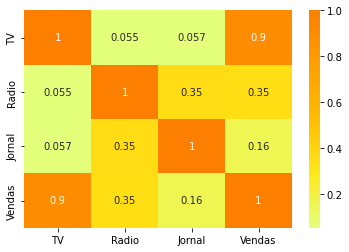

In [2]:
# importando os pacotes para visualizar a CORRELAÇÃO entre cada um dos itens da planilha
import seaborn as sns
import matplotlib.pyplot as plt

# criar o gráfico de calor (heatmap) e com a correlação indicada (annot=True)
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)

# exibe o gráfico
plt.show()  # verificamos que o investimento na TV tem um bom retorno de vendas

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [3]:
# separando a tabela em partes para treino e teste, para que a inteligencia artificial trabalhe
y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split


# test_size indicando que será usado 30% da base para teste
# random_state indica um embaralhamento padrão apenas para teste neste projeto (não é necessário indicar random_state)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [4]:
# inteligências artificiais utilizadas serão "Regressão Linear" e "RandomForest (Árvore de Decisão)"
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar os modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar os modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [5]:
# Será feito as duas previsões nos dois modelos
# O modelo que apresentar o R² mais próximo de 100% será o modelo escolhido
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
precisao_arviredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn import metrics

# comparação entre o teste e a previsão feita nos modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, precisao_arviredecisao))

# árvore de decisão se mostrou o melhor modelo para este caso, então será usado

0.9071151423684273
0.964420211786432


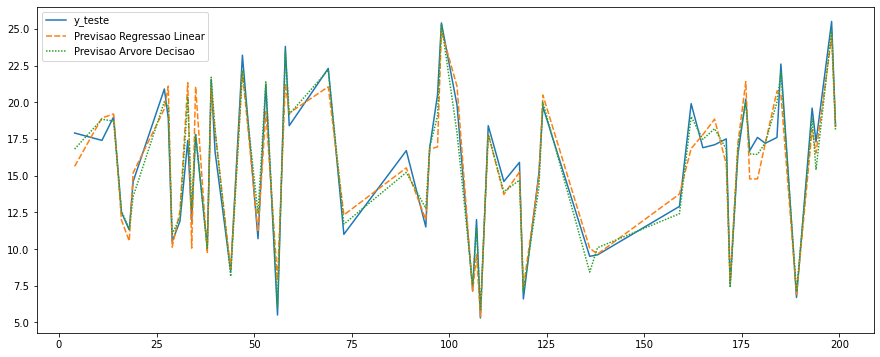

In [6]:
# Visualização gráfica das Previsões
# criando uma tabela nova com colunas para fazer as comparações
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsao Regressao Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsao Arvore Decisao"] = precisao_arviredecisao

plt.figure(figsize=(15, 6))  # apenas para aumentar o gráfico pra melhor visualização
sns.lineplot(data=tabela_auxiliar)
plt.show()


# Se necessário criar arquivo para visualizar os dados da previsão
# tabela_auxiliar.to_excel("Analise das Previsões de Vendas.xlsx", index=False)

#### Como fazer uma nova previsão?

In [7]:
# importar a tabela com as novas informações que você quer prever as vendas
nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)

# usar o modelo_arvoredecisao e fazer um .predict com ele
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.903  8.418 19.66 ]
